In [1]:
import pandas as pd
import numpy as np
import warnings
import math
warnings.filterwarnings(action='ignore')
import pandas as pd
import matplotlib.pyplot as plt
from hyperimpute.plugins.imputers import Imputers
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = ''
def scale_data(X):
    preproc = MinMaxScaler()
    cols = X.columns
    return pd.DataFrame(preproc.fit_transform(X), columns=cols)

In [3]:
tabular_feature_cols = [
'NP1COG',
'NP1HALL',
'NP1DPRS',
'NP1ANXS',
'NP1APAT',
'NP1DDS',
'NP1SLPN',
'NP1SLPD',
'NP1PAIN',
'NP1URIN',
'NP1CNST',
'NP1LTHD', # U1 scores
'NP1FATG',
'NP2SPCH',
'NP2SALV',
'NP2SWAL',
'NP2EAT',
'NP2DRES',
'NP2HYGN',
'NP2HWRT',
'NP2HOBB',
'NP2TURN',
'NP2TRMR',
'NP2RISE',
'NP2WALK',
'NP2FREZ', # u2 scores
'MSEADLG', # Modifier S and E overall score
'NHY', # U3 3.21
'NP3SPCH',
'NP3FACXP',
'NP3RIGN',
'NP3RIGRU',
'NP3RIGLU',
'NP3RIGRL',
'NP3RIGLL',
'NP3FTAPR',
'NP3FTAPL',
'NP3HMOVR',
'NP3HMOVL',
'NP3PRSPR',
'NP3PRSPL',
'NP3TTAPR',
'NP3TTAPL',
'NP3LGAGR',
'NP3LGAGL',
'NP3RISNG',
'NP3GAIT',
'NP3FRZGT',
'NP3PSTBL',
'NP3POSTR',
'NP3BRADY',
'NP3PTRMR',
'NP3PTRML',
'NP3KTRMR',
'NP3KTRML',
'NP3RTARU',
'NP3RTALU',
'NP3RTARL',
'NP3RTALL',
'NP3RTALJ',
'NP3RTCON',
'NP3TOT',
'SDMTOTAL', # Symbol Digit Modalities,  Neuropsychological Test, tot
'STAI_TOT', # State-Trait Anxiety Inventory for Adults tot 
'SFT_TOT', # Semantic Fluency tot
'SCOPA_AUT_TOT', #SCOPA-AUT, autonomic test, Lower score means better.
'REMSLEEP_TOT', # REM Sleep Behavior Questionnaire
'QUIP_A', # This is a questionnaire about gambling, buying, etc. It is a nerobehavioral questionnaire.
'QUIP_B',
'QUIP_C',
'QUIP_D',
'QUIP_E',
# 'UPSIT_TOT', # University_of_Pennsylvania_Smell_Identification_Test__UPSIT
'MoCA_score',
'LNS_TOT', # Letter Number Sequencing, total score
'HVLT_TOT_Recall', # Hopkins Verbal Learning Test， HVLT Immediate/Total Recall	Sum of HVLTRT1 - HVLTRT3
'HVLT_DCR_REC',
'HVLT_RETENTION',
'GDS_TOT', # The Geriatric Depression Scale (GDS) is a 30-item self-report assessment used to identify depression 
'GDS_Depressed', # if GDS tot >5
'ESS_TOT', # Epworth Sleepiness Scale
'ESS_Sleepy', # if ESS_ToT>10
'BJLOT_TOT', #  Benton Judgement of Line Orientation total score
'DATSCAN_CAUDATE_R', # 'CAUDATE_R',
'DATSCAN_CAUDATE_L', # 'CAUDATE_L',
'DATSCAN_PUTAMEN_R',# 'PUTAMEN_R',
'DATSCAN_PUTAMEN_L',# 'PUTAMEN_L']
# analysis tagets
'NP3_Akinetic_Rigid',
'NP3_Axial',
'NP3_Tremor',
'NP1TOT',
'NP2PTOT',
'NPTOT',
'LEDD',
]

In [4]:
gene_feature = [
'PRS90',
'GBA',
'LRRK2',
'SNCA',
'APOE_E4'    
]

tar=[
'NP1TOT',
'NP2PTOT',
'NP3TOT',    
'NPTOT',
'NP3_Axial',
'NP3_Tremor',
'NP3_Akinetic_Rigid',
'NHY',
'MoCA_score',
'ESS_TOT'
]

reg_tar=[
'NP1TOT',
'NP2PTOT',
'NP3TOT',    
'NPTOT',
'NP3_Axial',
'NP3_Tremor',
'NP3_Akinetic_Rigid',
'MoCA_score',
'ESS_TOT'
]
t_image_f = [
'DATSCAN_CAUDATE_R', # 'CAUDATE_R',
'DATSCAN_CAUDATE_L', # 'CAUDATE_L',
'DATSCAN_PUTAMEN_R',# 'PUTAMEN_R',
'DATSCAN_PUTAMEN_L',# 'PUTAMEN_L'
]
t_non_f = list(set(tabular_feature_cols)- set(t_image_f))

In [5]:
mri_features=pd.read_csv(path+'/processed/mri_segments.csv').columns[:-1].to_list()
ppmi_data_process = pd.read_csv(path+'/processed/data/hyperimputed.csv')


PPMI select based on events

In [6]:
new_feature_cols = ['PATNO', "EVENT_ID", 'ENROLL_AGE', 'SEX', 'INFODT']+tabular_feature_cols+gene_feature+list(mri_features)
new_cols = tabular_feature_cols+gene_feature+list(mri_features)

def events_differ(bs_patients_new,  env ='V04', tar=tar, interest_cols = new_feature_cols):
        sp = set(bs_patients_new.PATNO)
        envlist = ['BL', env]
        new_out = []
        for eid in sp:
                pr = bs_patients_new[bs_patients_new.PATNO==eid]
                pr = pr[pr.EVENT_ID.isin(envlist)]
                # here pre should larger than 1
                if len(pr) ==2:
                        current_vist = pr[pr.EVENT_ID=='BL']
                        data = current_vist[interest_cols].values[0]
                        next_vist = pr[pr.EVENT_ID==env]
                        next_labels = next_vist[tar]
                        # print(next_labels)
                        current_labels = current_vist[tar]
                        # print(current_labels)
                        
                        targets = next_labels.values[0]-current_labels.values[0]
                        data= [*data , *targets]
                        new_out.append(data)
        return new_out

In [24]:
envss ='V08'
new_tar = ["Change_"+t for t in tar]
new_tar_reg = ["Change_"+t for t in reg_tar]
data = events_differ(ppmi_data_process,  env = envss, tar=tar)
pd_patients_all =pd.DataFrame(data,columns= new_feature_cols+new_tar)
pd_patients_all.drop_duplicates(inplace=True)
pd_patients_all.describe().to_csv('results/ppmi_descri_pd_36month_full_imputed.csv')
print(len(pd_patients_all))

504


In [25]:
def label_func_pos(datas, thr_mean, thr_std, k=1):
    labels =[]
    for data in datas:
    # the smaller the better 
        if data<=(thr_mean-k* math.sqrt(thr_std)):
            label=0
        elif (thr_mean-k*math.sqrt(thr_std)) < data <(thr_mean+k*math.sqrt(thr_std)):
            label=1
        else:
            label = 2
        labels.append(label)
    return labels

def label_func_neg(datas, thr_mean, thr_std, k=1):
    labels =[]
    for data in datas:
    # the larger the better 
        if data<=(thr_mean-k*math.sqrt(thr_std)):
            label=2
        elif (thr_mean-k*math.sqrt(thr_std)) <data <(thr_mean+k*math.sqrt(thr_std)):
            label=1
        elif pd.isna(data):
            label = pd.NA
        else:
            label = 0
        labels.append(label)
    return labels

def label_func_hy(data):
    # the smaller the better 
    if data<0:
        label=0
    elif data ==0:
        label = 1
    elif pd.isna(data):
            label = pd.NA
    else:
        label=2
    return label

label_tar = ["Label_"+t for t in tar]

In [26]:
h_thred=pd.read_csv('/home/v-jielian/Desktop/Pronomal_analysis/Pronomal_analysis/results/hc_36_for_label.csv')
h_thred.head()

,Unnamed: 0,Change_NP1TOT,Change_NP2PTOT,Change_NP3TOT,Change_NPTOT,Change_NP3_Axial,Change_NP3_Tremor,Change_NP3_Akinetic_Rigid,Change_NHY,Change_MoCA_score,Change_ESS_TOT
0,mean,0.394558,0.149660,0.102041,0.646259,0.081633,0.006803,0.013605,0.0,-0.776224,-0.061644
1,var,9.596683,1.045942,3.270338,15.106887,0.294660,1.047899,1.575156,0.0,4.611543,7.961691


In [27]:
k=1
pd_patients_all['Label_NP1TOT'] = label_func_pos(pd_patients_all['Change_NP1TOT'], h_thred['Change_NP1TOT'][0], h_thred['Change_NP1TOT'][1],k)
pd_patients_all['Label_NP2PTOT'] = label_func_pos(pd_patients_all['Change_NP2PTOT'], h_thred['Change_NP2PTOT'][0], h_thred['Change_NP2PTOT'][1],k)
pd_patients_all['Label_NP3TOT'] = label_func_pos(pd_patients_all['Change_NP3TOT'], h_thred['Change_NP3TOT'][0], h_thred['Change_NP3TOT'][1],k)
pd_patients_all['Label_NP3_Axial'] = label_func_pos(pd_patients_all['Change_NP3_Axial'], h_thred['Change_NP3_Axial'][0], h_thred['Change_NP3_Axial'][1],k)
pd_patients_all['Label_NP3_Tremor'] = label_func_pos(pd_patients_all['Change_NP3_Tremor'], h_thred['Change_NP3_Tremor'][0], h_thred['Change_NP3_Tremor'][1],k)
pd_patients_all['Label_NP3_Akinetic_Rigid'] = label_func_pos(pd_patients_all['Change_NP3_Akinetic_Rigid'], h_thred['Change_NP3_Akinetic_Rigid'][0], h_thred['Change_NP3_Akinetic_Rigid'][1],k)
pd_patients_all['Label_NPTOT'] =  label_func_pos(pd_patients_all['Change_NPTOT'], h_thred['Change_NPTOT'][0], h_thred['Change_NPTOT'][1],k)
pd_patients_all['Label_ESS_TOT'] =  label_func_pos(pd_patients_all['Change_ESS_TOT'], h_thred['Change_ESS_TOT'][0], h_thred['Change_ESS_TOT'][1],k)
pd_patients_all['Label_MoCA_score'] =  label_func_neg(pd_patients_all['Change_MoCA_score'], h_thred['Change_MoCA_score'][0], h_thred['Change_MoCA_score'][1],k)
pd_patients_all['Label_NHY'] = pd_patients_all['Change_NHY'].apply(label_func_hy)

In [28]:
pd_patients_all.to_csv('/home/v-jielian/Desktop/Pronomal_analysis/processed/data/ppmi_36month_all_full_imputed.csv', index=False)

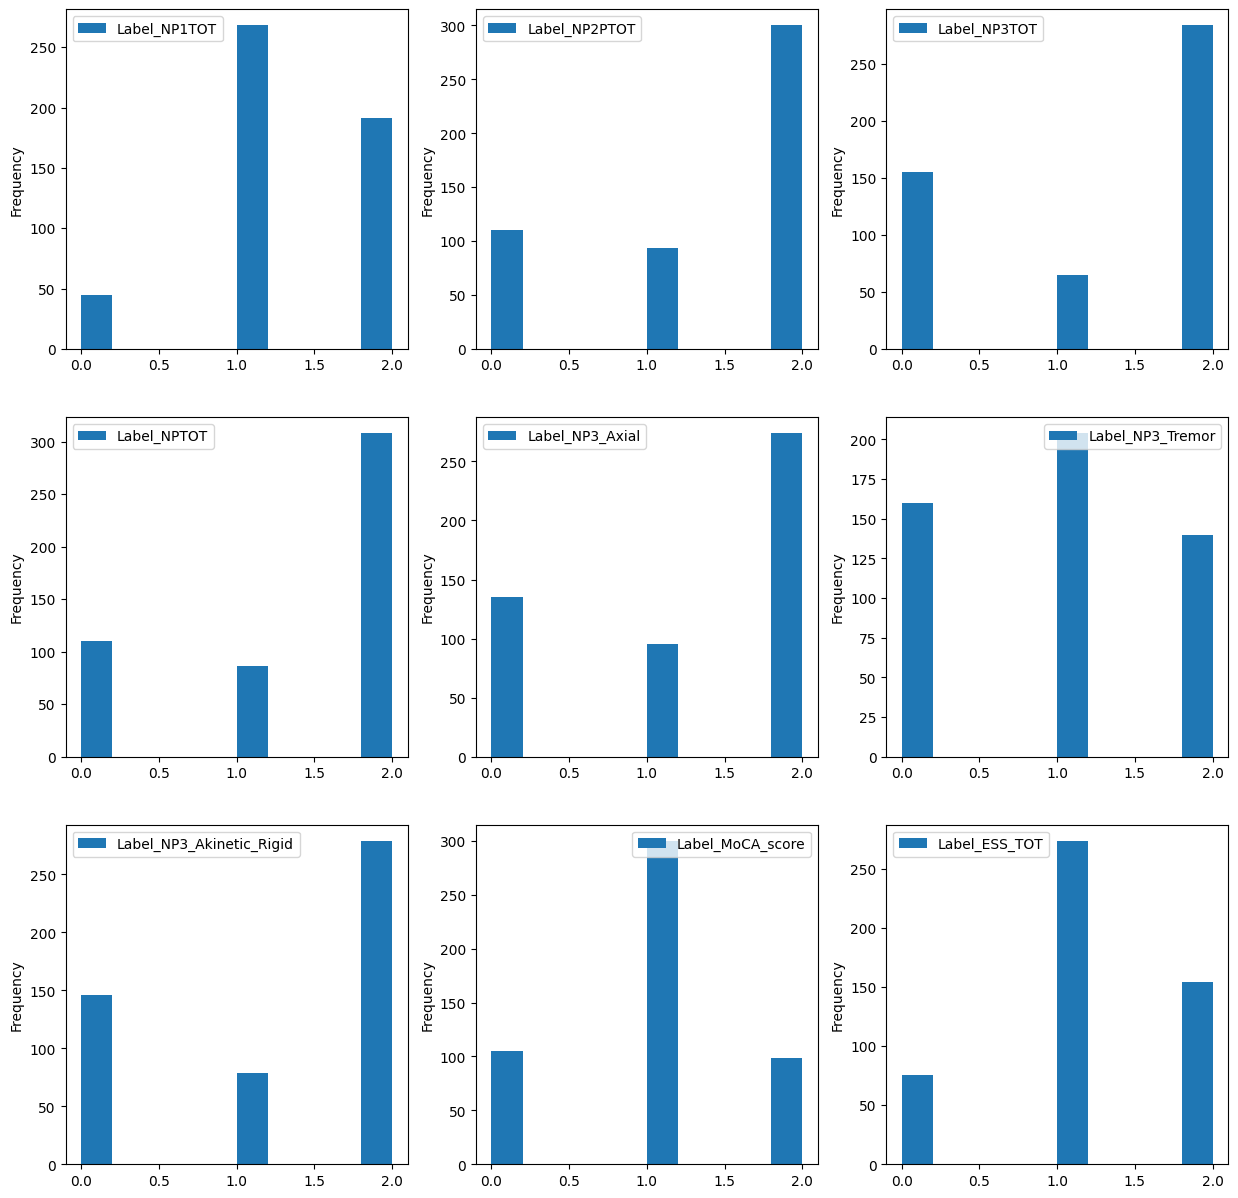

In [29]:
new_clss_label = ["Label_"+tar for tar in reg_tar]
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes_list = []
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes_list.append(axes[i, j]) 

for i in range(len(axes_list)):
    ax = axes_list[i]
    pd_patients_all[new_clss_label[i]].plot(kind='hist', ax =ax, legend=new_tar_reg[i])
fig.savefig('results/pd_label_36_full_imputed.png')

In [30]:

def train_test(pd_patients_all, t_label = 'Label_NHY', thred =0.8):

    print('=====================================')
    print('Train Test seperation!!!!')
    pd_patients_all['INFODT']= pd.to_datetime(pd_patients_all['INFODT'])
    pd_patients_all.sort_values(by='INFODT',ascending=True,inplace=True)
    pd_patients_all.reset_index(drop=True,inplace=True)
    # m_l = pd_patients_all[t_label].mean()
    postive_case = pd_patients_all[pd_patients_all[t_label]>0]
    negtive_case = pd_patients_all[pd_patients_all[t_label]<=0]
    train_all_idx = list(postive_case[:int(len(postive_case)*thred)].index)+list(negtive_case[:int(len(negtive_case)*thred)].index)
    train_all=pd_patients_all.loc[train_all_idx]
    test = pd_patients_all.drop(train_all_idx)
    
    train_all.reset_index(inplace=True)
    train_all[new_cols] = scale_data(train_all[new_cols]) # normlized
    
    test.reset_index(inplace=True)
    test[new_cols] =scale_data(test[new_cols]) # normlized

    for label in label_tar: 
        print(label)
        # print("Train:",train_all[label].value_counts()[1]/sum(train_all[label].value_counts())) 
        print("Train:",train_all[label].value_counts())
        # print("test:",test[label].value_counts()[1]/sum(test[label].value_counts()))
        print("test:",test[label].value_counts())
    return train_all, test

train_all, test= train_test(pd_patients_all)

Train Test seperation!!!!
Label_NP1TOT
Train: Label_NP1TOT
1    223
2    147
0     32
Name: count, dtype: int64
test: Label_NP1TOT
1    45
2    44
0    13
Name: count, dtype: int64
Label_NP2PTOT
Train: Label_NP2PTOT
2    240
0     85
1     77
Name: count, dtype: int64
test: Label_NP2PTOT
2    60
0    25
1    17
Name: count, dtype: int64
Label_NP3TOT
Train: Label_NP3TOT
2    215
0    134
1     53
Name: count, dtype: int64
test: Label_NP3TOT
2    69
0    21
1    12
Name: count, dtype: int64
Label_NPTOT
Train: Label_NPTOT
2    238
0     96
1     68
Name: count, dtype: int64
test: Label_NPTOT
2    70
1    18
0    14
Name: count, dtype: int64
Label_NP3_Axial
Train: Label_NP3_Axial
2    208
0    111
1     83
Name: count, dtype: int64
test: Label_NP3_Axial
2    66
0    24
1    12
Name: count, dtype: int64
Label_NP3_Tremor
Train: Label_NP3_Tremor
1    161
0    137
2    104
Name: count, dtype: int64
test: Label_NP3_Tremor
1    43
2    36
0    23
Name: count, dtype: int64
Label_NP3_Akinetic_Rigi

In [31]:
file_features = ['PATNO', 'SEX', 'ENROLL_AGE']+tabular_feature_cols+gene_feature+list(mri_features)+label_tar
train_all[file_features].to_csv('/home/v-jielian/Desktop/Pronomal_analysis/processed/data/ppmi_36month_train_full_imputed.csv', index=False)
test[file_features].to_csv('/home/v-jielian/Desktop/Pronomal_analysis/processed/data/ppmi_36month_test_full_imputed.csv', index=False)
